# Merging CA ES Report Data with USA Census Business/Warehouse Data

In [1]:
# I M P O R T S
import pandas as pd
import numpy as np
import glob
import os

import seaborn as sns
import matplotlib.pyplot as plt

# C U S T O M  S E T T I N G S
pd.options.display.max_columns = 90
pd.options.display.max_rows = 100

# C U S T O M  S T Y L E 
plt.style.use('gstyle.mplstyle')

In [2]:
# importing all_es_data 
path = '../processed_data/all_processed.csv'
df = pd.read_csv(path)

df.head()
# split each year into its own df 
df1 = df[df['year'] == 2013]
df2 = df[df['year'] == 2014]
df3 = df[df['year'] == 2018]
df4 = df[df['year'] == 2021]

In [3]:
zip_dir = '../processed_data/business_counts_by_zip/'
files = os.listdir(zip_dir)

def importer(year): 
    filename = 'zip_df_' + str(year) + '.csv'
    file_path = zip_dir + filename

    # import ZIP-BIZ DF
    new_df = pd.read_csv(file_path, dtype = int)
    new_cols= {'year': 'census_year'}
    new_df.rename(columns = new_cols, inplace=True)
    
    #print (new_df.head(), new_df.describe(), new_df.info())
    return (new_df)

> ### join on ZIP. data by "year" doesn't match anyway (it's ok)
> * #### for 2013 (ES1), use 2012 (ES data is 2006-2010)
> * #### for 2014 (ES2), use 2013 (ES data is 2010- 2014)
> * #### for 2018 (ES3), use use 2014 (ES data is 2012 - 2014)
> * #### for 2021 (ES4), use 2017 data (ES data is 2015 - 2017)
>
> <br>

In [4]:
zip_1 = importer(12)
merged_1 = df1.merge(zip_1, left_on = 'zip', right_on = 'zip' )
df1.shape, zip_1.shape, merged_1.shape

((1769, 57), (1355, 7), (1339, 63))

In [5]:
zip_2 = importer(13)
merged_2 = df2.merge(zip_2, left_on = 'zip', right_on = 'zip' )

df2.shape, zip_2.shape, merged_2.shape

((8035, 57), (1355, 7), (8035, 63))

In [6]:
zip_3 = importer(14)
merged_3 = df3.merge(zip_3, left_on = 'zip', right_on = 'zip' )

df3.shape, zip_3.shape, merged_3.shape

((8035, 57), (1355, 7), (8035, 63))

In [7]:
zip_4 = importer(14)
merged_4 = df4.merge(zip_4, left_on = 'zip', right_on = 'zip' )

df4.shape, zip_4.shape, merged_4.shape

((8035, 57), (1355, 7), (8035, 63))

In [14]:
# join all into megaset

# appending, printing
df_all = pd.concat([merged_1, merged_2, merged_3, merged_4])
df_all.to_csv('../processed_data/all_merged.csv', index = False)

In [9]:
df_all.shape

(25444, 63)

In [10]:
df_all.head()

,zip,total population,ozone,ozone pctl,pm2.5,pm2.5 pctl,diesel pm,diesel pm pctl,pesticides,pesticides pctl,traffic,traffic pctl,cleanup sites,cleanup sites pctl,groundwater threats,groundwater threats pctl,haz. waste,haz. waste pctl,imp. water bodies,imp. water bodies pctl,solid waste,solid waste pctl,pollution burden,pollution burden score,asthma,asthma pctl,low birth weight,low birth weight pctl,education,education pctl,linguistic isolation,linguistic isolation pctl,poverty,poverty pctl,pop. char.,pop. char. score,ces_score,ces_per_range,year,census tract,county,drinking water,drinking water pctl,tox. release,tox. release pctl,pollution burden pctl,unemployment,unemployment pctl,pop. char. pctl,city,latitude,longitude,ces_per,cardiovascular disease,cardiovascular disease pctl,housing burden,housing burden pctl,census_year,est total,est gen,est cold,est farm,est other
0,93706,41087,0.177311,76.55,15.61,95.96,6.14,56.19,1120.30,90.59,388.7,37.64,195.0,97.58,301.0,93.43,4.825,84.99,0,0.00,12.0,84.91,73.4,7.3,132.40,98.95,9.10,95.94,47.6,94.22,16.9,79.82,70.6,96.91,90.4,9.0,66.30,96-100% (highest scores),2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,4,4,0,0,0
1,93307,82658,0.512336,93.70,19.40,99.69,9.57,64.73,7128.70,98.37,710.3,52.05,104.0,92.39,202.0,88.83,10.100,94.64,0,0.00,20.0,95.69,76.9,7.7,55.93,79.51,7.49,76.29,49.7,95.44,18.8,84.27,67.1,95.56,82.5,8.2,63.44,96-100% (highest scores),2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,1,0,0,1,0
2,95205,38069,0.022790,38.53,12.51,71.65,18.95,80.50,94.20,72.24,1352.2,72.67,96.0,91.62,325.0,94.11,9.600,94.22,6,63.87,5.0,53.97,73.5,7.4,73.30,90.71,6.95,60.92,47.9,94.40,23.7,89.37,68.6,96.23,83.8,8.4,61.60,96-100% (highest scores),2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,1,0,0,0,1
3,93702,48607,0.317831,86.99,16.08,97.06,36.85,94.91,7.92,53.79,1070.1,65.38,56.0,82.80,73.0,65.47,1.275,48.13,0,0.00,2.0,28.97,66.4,6.6,93.50,95.32,8.40,91.26,55.4,97.38,22.4,87.97,73.5,97.72,90.1,9.0,59.83,96-100% (highest scores),2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,0,0,0,0,0
4,90058,3223,0.015613,31.32,15.26,94.98,56.80,98.36,0.00,0.00,923.7,59.97,415.0,99.83,178.0,86.73,58.775,100.00,7,71.67,34.0,99.22,71.9,7.2,57.20,80.80,7.34,72.00,69.6,99.70,37.9,97.69,90.5,99.88,82.2,8.2,59.08,96-100% (highest scores),2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,35,12,19,0,4


In [11]:
### PRELIM VIZ FOR WAREHOUSES 

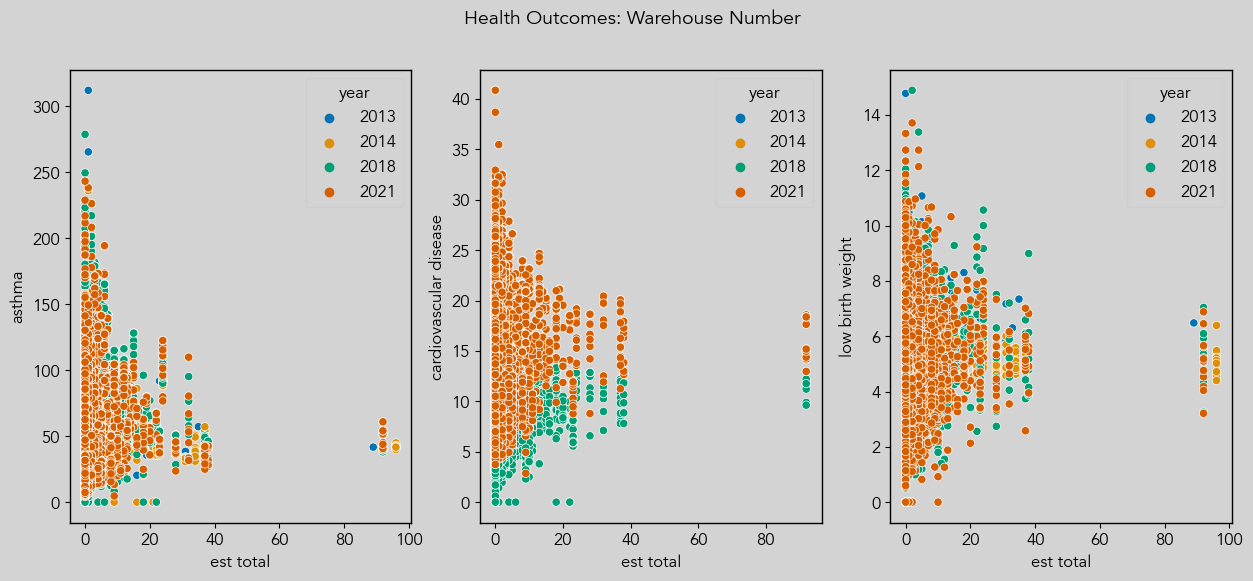

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=False, sharex = False,  figsize=(15, 6))

fig.suptitle('Health Outcomes: Warehouse Number')
#dfn = df_all[df['est total'] < 8000]
x = 'est total'
y1 = 'asthma'
y2 = 'cardiovascular disease'
y3 = 'low birth weight'

sns.scatterplot(
        data = df_all, 
        x = x, 
        y = y1, 
        ax = ax[0], 
        palette = 'colorblind',
        hue = 'year'
        );
sns.scatterplot(
        data = df_all,
        x = x, 
        y = y2, 
        ax = ax[1], 
        palette = 'colorblind',
        hue = 'year'
        );
sns.scatterplot(
        data = df_all,
        x = x, 
        y = y3, 
        ax = ax[2], 
        palette = 'colorblind',
        hue = 'year'
        );

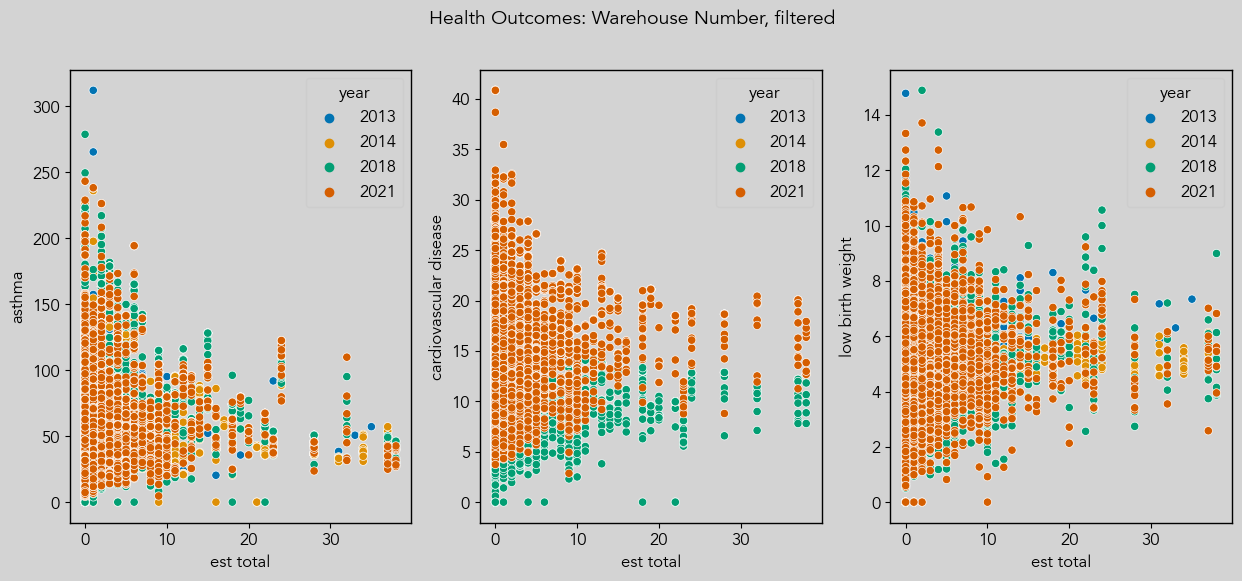

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=False, sharex = False,  figsize=(15, 6))

fig.suptitle('Health Outcomes: Warehouse Number, filtered')
dfn = df_all[df_all['est total'] < 40]
x = 'est total'
y1 = 'asthma'
y2 = 'cardiovascular disease'
y3 = 'low birth weight'

sns.scatterplot(
        data = dfn, 
        x = x, 
        y = y1, 
        ax = ax[0], 
        palette = 'colorblind',
        hue = 'year'
        );
sns.scatterplot(
        data = dfn, 
        x = x, 
        y = y2, 
        ax = ax[1], 
        palette = 'colorblind',
        hue = 'year'
        );
sns.scatterplot(
        data = dfn, 
        x = x, 
        y = y3, 
        ax = ax[2], 
        palette = 'colorblind',
        hue = 'year'
        );